## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [16]:
! git clone https://www.github.com/DS3001/assignment3

fatal: destination path 'assignment3' already exists and is not an empty directory.


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.

In [17]:
import pandas as pd

df = pd.read_csv('assignment3/data/car_data.csv')
print(df.shape, '\n')
print(df.head(), '\n')

(1000, 5) 

   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0 



2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
**The variables did not have any missings to clean.**

In [18]:
print(df.describe(), '\n')
#Converting the Gender varuables into a dummy variable
var = 'Gender'
print(df[var].value_counts(), '\n')
df['Gender_dummy'] = 0
df.loc[df[var] == 'Female', 'Gender_dummy'] = 1
print(df['Gender_dummy'].value_counts(), '\n')
#Creating matrix X
vars = ['Age','AnnualSalary']
X = df.loc[:,vars]
y = df['Purchased']

           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000 

Female    516
Male      484
Name: Gender, dtype: int64 

1    516
0    484
Name: Gender_dummy, dtype: int64 



3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.

In [19]:
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x
X = X.apply(maxmin)
X.describe()


,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


4. Split the sample into a ~80% training dataset and a ~20% testing dataset.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.

**From the graph it looks like the optimal K is around 8.**

[ 8 10 14]


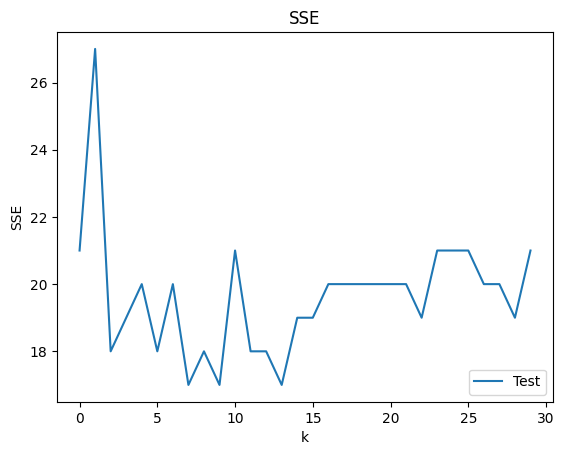

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
 model = KNeighborsClassifier(n_neighbors=k+1)
 fitted_model = model.fit(X_train,y_train)
 y_hat = fitted_model.predict(X_test)
 SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?

**For the majority of cases, 0's map to 0's and 1's map to 1's. There are 15 times where a 0 is mapped to a 1, and 3 times where a 1 is mapped to a 0, therefore 9% of cases are predicted incorrectly and 91% of cases are predicted accurately.**

In [7]:
model = KNeighborsClassifier(n_neighbors=9)
classified_model = model.fit(X_train, y_train)
y_hat = classified_model.predict(X_test)

pd.crosstab(y_test, y_hat)

col_0,0,1
Purchased,,
0,104,15
1,3,78


7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

**For this model, the predictons for females are correct 87% of the time, while the predictions for males are correct 77% of the time. This means that it predicts more accurately for females 10% of the time.**

In [23]:
#Resplit the data including the gender variable:
from sklearn.model_selection import train_test_split
vars = ['Age','AnnualSalary','Gender']
X = df.loc[:,vars]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)
# Use the selected k to train the model, not using the gender variable:
model = KNeighborsClassifier(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train) # Train the model o
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1)) # Predict values for tes
# Break out the true/predicted values by recorded sex:
y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']
print(pd.crosstab(y_F, y_hat_F), '\n')
print(pd.crosstab(y_M, y_hat_M))


col_0       0   1
Purchased        
0          58   9
1           5  33 

col_0       0   1
Purchased        
0          45   7
1          15  28


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
**There are no NA's to handle.**

In [ ]:
df = pd.read_csv('assignment3/data/USA_cars_datasets.csv')
df = df[['price', 'year', 'mileage']]

print(df.isnull().sum(), '\n')
print(df.head(), '\n')
print(df.shape)

price      0
year       0
mileage    0
dtype: int64 

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654 

(2499, 3)


2. Maxmin normalize `year` and `mileage`.

In [ ]:
vars = ['year','mileage']
X = df.loc[:,vars]

def maxmin(x):
 x = (x-min(x))/(max(x)-min(x))
 return x
X = X.apply(maxmin)
X.describe()

,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


3. Split the sample into ~80% for training and ~20% for evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

**As k increases there is less variance between the data points, they appear to be more clustered together. In the plot where k=3 there is a low of space between data points, but this also seems to begin to occur again once k=300.**

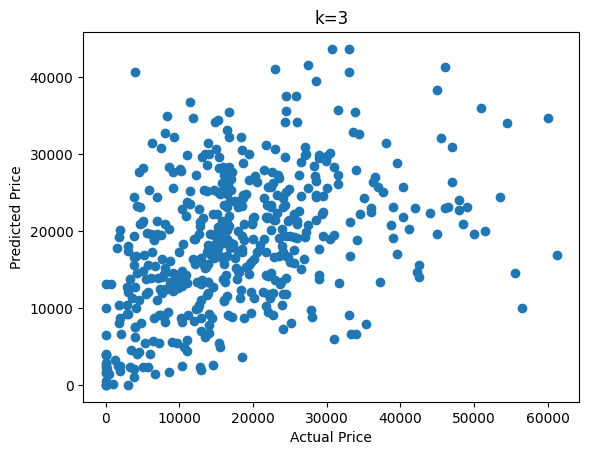

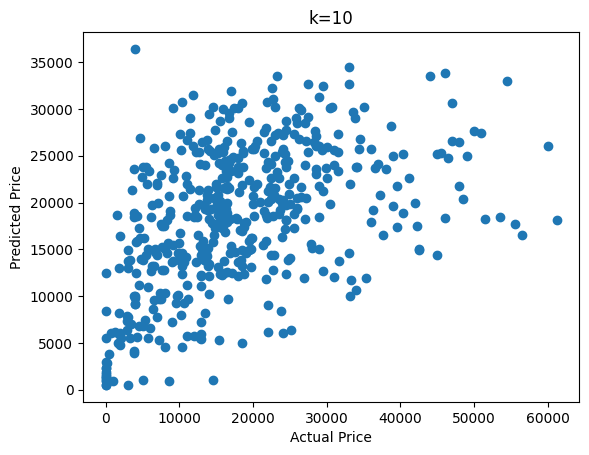

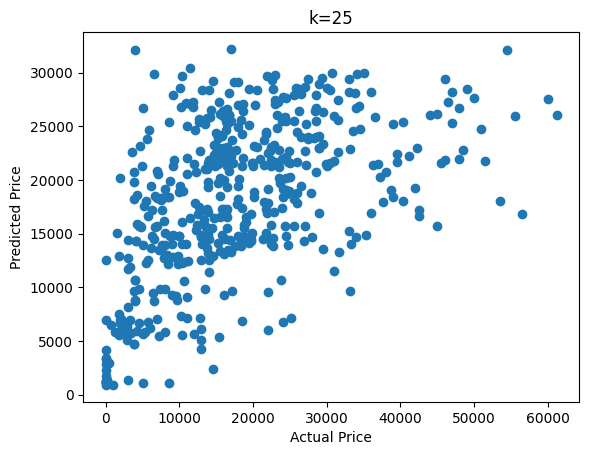

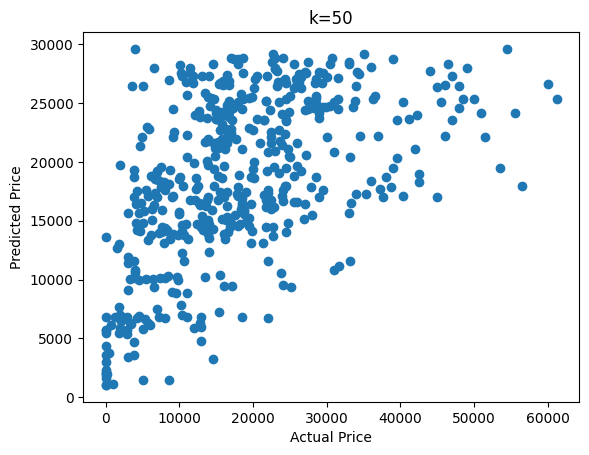

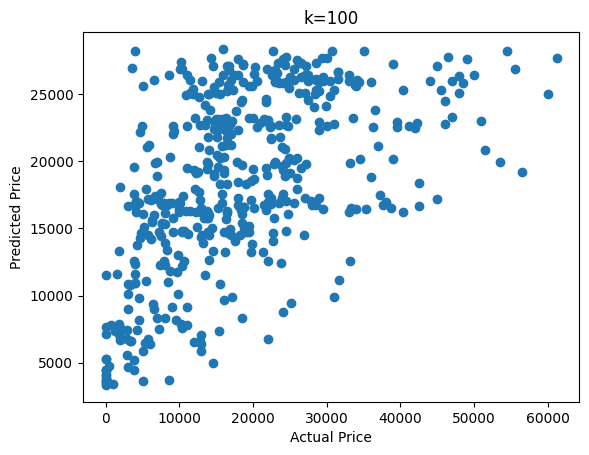

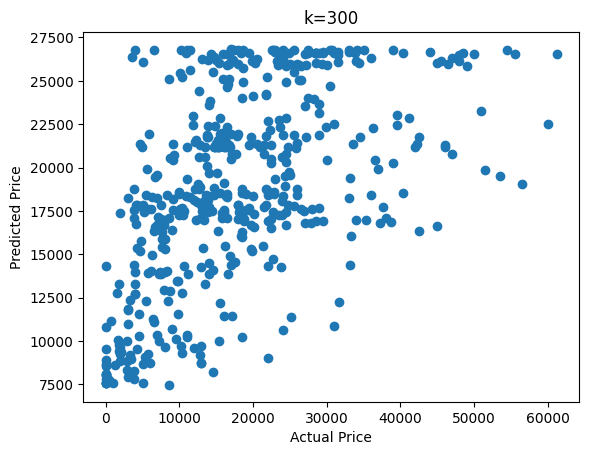

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

k_values = [3, 10, 25, 50, 100, 300]
SSE = []

for k in k_values:
  model = kNNRegression(n_neighbors=k)
  fitted_model = model.fit(X_train, y_train)
  y_hat = fitted_model.predict(X_test)
  SSE.append(np.sum((y_test-y_hat)**2))

  plt.scatter(y_test, y_hat, label=f'k={k}')
  plt.xlabel('Actual Price')
  plt.ylabel('Predicted Price')
  plt.title(f'k={k}')
  plt.show()

5. Determine the optimal $k$ for these data.

**From the K values tested the optimal K is 100.**

In [ ]:
SSE_min = np.min(SSE)
index = SSE.index(SSE_min)
optimal_k = k_values[index]
print(optimal_k)

100


6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**The plots for k values less than 100 demonstrate characteristics of overfitting. They are more scattered which could be indicative of it capturing the outliers. As k increases, like in the plot of k = 300, we can see that the points are more clustered together which could be underfitting the data.**

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.

In [29]:
import pandas as pd

df = pd.read_csv('assignment3/data/heart_failure_clinical_records_dataset.csv')
print(df.isnull().sum())
df = df.drop('time', axis=1)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


2. Make a correlation matrix. What variables are strongly associated with a death event?

**From the correlaion matrix the variables most strongly associated with a death event are "serum_creatine", "age", "serum_sodium", and "ejection_fraction".**

In [30]:
corr = df.corr()
print(corr['DEATH_EVENT'].sort_values(ascending=False))

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
Name: DEATH_EVENT, dtype: float64


3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?

**For the variables "anaemia" and "high_blood_pressure".**

In [31]:
dummy_variables = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for variable in dummy_variables:
  print(df.groupby(variable)['DEATH_EVENT'].describe())

         count      mean       std  min  25%  50%  75%  max
anaemia                                                    
0        170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1        129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
          count      mean       std  min  25%  50%  75%  max
diabetes                                                    
0         174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1         125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                     count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                    
0                    194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                    105.0  0.371429  0.485504  0.0  0.0  0.0  1.0  1.0
     count      mean       std  min  25%  50%  75%  max
sex                                                    
0    105.0  0.323810  0.470173  0.0  0.0  0.0  1.0  1.0
1    194.0  0.319588  0.467523  0.0  0.0  0.0  1.0  1.0
    

4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.

In [32]:
vars = ['anaemia','high_blood_pressure']
X = df.loc[:, vars]
y =df['DEATH_EVENT']

5. Maxmin normalize all of the variables in `X`.


In [33]:
def maxmin(x):
 x = (x-min(x))/(max(x)-min(x))
 return x

X = X.apply(maxmin)

6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

k_bar = 30
k_grid = np.arange(1, k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = kNNRegression(n_neighbors=k+1)
  fitted_model = model.fit(X_train, y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)
print(SSE_min)

[26]
13.792899408284024


8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**The second model had a very similar but slighly lower Sum of Squared Error.
A lower SSE indicates a beter model but in this scenario the SSE is not much lower so the difference is not signifcant. Given that the difference is not significant I would still prefer the model with more variables because it is simpler to interpret.**

In [49]:
new_df = df.drop('DEATH_EVENT', axis=1)
X = new_df.loc[:,:]
X.apply(maxmin)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = kNNRegression(n_neighbors=k+1)
  fitted_model = model.fit(X_train, y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)
print(SSE_min)

[20]
13.7225


**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.
2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?